<a href="https://colab.research.google.com/github/GUILLENJV/Optimizaci-n-de-Campa-as/blob/master/D_TG_Stacking_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stacking Ensemble for Deep Learning Neural Networks

### Nivel 0

In [ ]:
#learned embedding encoding for a neural network
from numpy import unique
import numpy
from numpy import array
import pandas as pd
import datetime
from time import sleep
from tqdm import tqdm
import os
from pandas import read_csv
import json
import tensorflow as tf
from tensorflow import keras
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#from predict import model
from sklearn import preprocessing
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from keras.utils import to_categorical

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder(handle_unknown='ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#y_train_ecn, y_test_enc = to_categorical(y_train_enc, y_test_enc)

# define the  model


# fit model on dataset
def modelo_mlp(X_train_enc, y_train_enc):
  model = Sequential()
  model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='relu',
                kernel_initializer='uniform'))
  #model.add(Dropout(0.3))
  #model.add(Dense(250, kernel_initializer = 'he_uniform',  activation = 'relu'))
  #model.add(Dropout(0.3))
  model.add(Dense(2, kernel_initializer = 'uniform', activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=64, validation_data=(X_test_enc, y_test_enc), shuffle=False)
  return model

# create directory for models
!makedirs('models_1')
# fit and save models
n_members = 5
for i in range(n_members):
 # fit model
  model = modelo_mlp(X_train_enc, y_train_enc)
 # save model
  filename = 'models_1/model_' + str(i + 1) + '.h5'
  model.save(filename)
  print('>Saved %s' % filename)

/bin/bash: -c: line 1: syntax error near unexpected token `'models_1''
/bin/bash: -c: line 1: `makedirs('models_1')'


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/100
160/160 [==============================] - 3s 12ms/step - loss: 0.2575 - accuracy: 0.8968 - val_loss: 0.0851 - val_accuracy: 0.9632
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0812 - accuracy: 0.9626 - val_loss: 0.0694 - val_accuracy: 0.9684
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0726 - accuracy: 0.9656 - val_loss: 0.0654 - val_accuracy: 0.9703
Epoch 4/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0691 - accuracy: 0.9673 - val_loss: 0.0640 - val_accuracy: 0.9705
Epoch 5/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0668 - accuracy: 0.9675 - val_loss: 0.0634 - val_accuracy: 0.9719
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0650 - accuracy: 0.9688 - val_loss: 0.0632 - val_accuracy: 0.9728
Epoch 7/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0634 - accuracy: 0.9694 - val_loss: 0.0632 - val_accuracy: 0.972

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 2s 9ms/step - loss: 0.2600 - accuracy: 0.8940 - val_loss: 0.0849 - val_accuracy: 0.9625
Epoch 2/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0811 - accuracy: 0.9625 - val_loss: 0.0692 - val_accuracy: 0.9684
Epoch 3/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0725 - accuracy: 0.9658 - val_loss: 0.0653 - val_accuracy: 0.9698
Epoch 4/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0690 - accuracy: 0.9675 - val_loss: 0.0639 - val_accuracy: 0.9703
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0667 - accuracy: 0.9677 - val_loss: 0.0634 - val_accuracy: 0.9723
Epoch 6/100
160/160 [==============================] - 2s 12ms/step - loss: 0.0649 - accuracy: 0.9686 - val_loss: 0.0633 - val_accuracy: 0.9732
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.0634 - accuracy: 0.9699 - val_loss: 0.0634 - val_accuracy: 0.9737
Epoch 8/10

### Nivel 1

In [ ]:
!pip install pydot

In [ ]:
!pip install concatenate

In [ ]:
# stacked generalization with neural net meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
#from keras.layers.merge import concatenate
#from keras.models import Concatenate
from tensorflow.keras.layers import concatenate
from numpy import argmax


# load models from file
def load_all_models(n_models):
 all_models = list()
 for i in range(n_models):
 # define filename for this ensemble
  filename = 'models_1/model_' + str(i + 1) + '.h5'
 # load model from file
  model = load_model(filename)
 # add to list of members
  all_models.append(model)
  print('>loaded %s' % filename)
 return all_models


# define stacked model from multiple member input models
def define_stacked_model(members):
 # update all layers in all models to not be trainable
 for i in range(len(members)):
  model = members[i]
  for layer in model.layers:
 # make not trainable
   layer.trainable = False
 # rename to avoid 'unique layer name' issue
   layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
 # define multi-headed input
   ensemble_visible = [model.input for model in members]
 # concatenate merge output from each model
   ensemble_outputs = [model.output for model in members]
   merge = concatenate(ensemble_outputs)
   hidden = Dense(10, activation='relu')(merge)
   output = Dense(2, activation='sigmoid')(hidden)
   model = Model(inputs=ensemble_visible, outputs=output)
 # plot graph of ensemble
   plot_model(model, show_shapes=True, to_file='model_graph.png')
 # compile
   model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
 return model

# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
 # prepare input data
 X = [inputX for _ in range(len(model.input))]
 # encode output data
 #inputy_enc = to_categorical(inputy)
 # fit model
 model.fit(X, inputy, epochs=300, verbose=0)

# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
 # prepare input data
 X = [inputX for _ in range(len(model.input))]
 # make prediction
 return model.predict(X, verbose=0)

# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test_enc, y_test_enc)
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test_enc)
yhat = np.argmax(yhat, axis=1)
#yhat = to_categorical(yhat)
y_test_enc = np.argmax(y_test_enc, axis=1)
acc = accuracy_score(y_test_enc, yhat)
print('Stacked Test Accuracy: %.3f' % acc)


>loaded models_1/model_1.h5
>loaded models_1/model_2.h5
>loaded models_1/model_3.h5
>loaded models_1/model_4.h5
>loaded models_1/model_5.h5
Loaded 5 models
Stacked Test Accuracy: 0.970


<Axes: title={'center': 'Matrix de confusión'}>

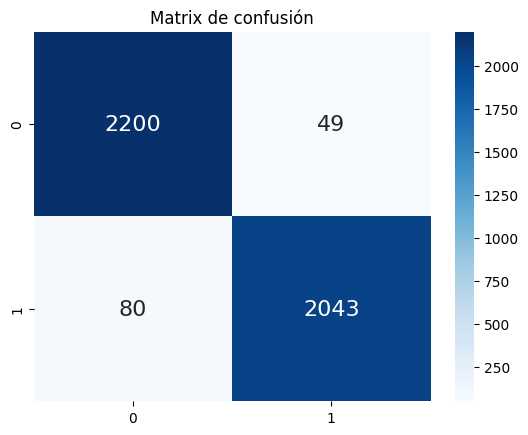

In [ ]:
# Se obtiene la matriz de confusión
y_pred=predict_stacked_model(stacked_model, X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
#y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

In [ ]:
# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2249
           1       0.98      0.96      0.97      2123

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



In [ ]:
y_test_enc.shape

(4372,)